# NYC Uber/Lyft - Rides from Jan 1, 2024 to July 31, 2024

## Imports

In [1]:
import DsUtilFuncs as ds
import matplotlib.pyplot as plt
import numpy as np

In [2]:
datetime_transformer = ds.DateTimeFeatureExtractor()

all_months = []
for _, file_name in ds.tripdata_files.items(): 
    df = ds.get_DataFrame(file_name)
    df = datetime_transformer.transform(df) 
    daily_counts = ds.prepare_rides_per_day_data(df)
    all_months.append(daily_counts)
    del df 

Trying to load fhvhv_tripdata_2022-01.parquet from data/fhvhv_tripdata_2022-01.parquet
Trying to load fhvhv_tripdata_2022-02.parquet from data/fhvhv_tripdata_2022-02.parquet
Trying to load fhvhv_tripdata_2022-03.parquet from data/fhvhv_tripdata_2022-03.parquet
Trying to load fhvhv_tripdata_2022-04.parquet from data/fhvhv_tripdata_2022-04.parquet
Trying to load fhvhv_tripdata_2022-05.parquet from data/fhvhv_tripdata_2022-05.parquet
Trying to load fhvhv_tripdata_2022-06.parquet from data/fhvhv_tripdata_2022-06.parquet
Trying to load fhvhv_tripdata_2022-07.parquet from data/fhvhv_tripdata_2022-07.parquet
Trying to load fhvhv_tripdata_2022-08.parquet from data/fhvhv_tripdata_2022-08.parquet
Trying to load fhvhv_tripdata_2022-09.parquet from data/fhvhv_tripdata_2022-09.parquet
Trying to load fhvhv_tripdata_2022-10.parquet from data/fhvhv_tripdata_2022-10.parquet
Trying to load fhvhv_tripdata_2022-11.parquet from data/fhvhv_tripdata_2022-11.parquet
Trying to load fhvhv_tripdata_2022-12.parqu

In [3]:
# Calculate global y-axis limits across all months
y_min = min(month_rides.min() for month_rides, _, _, _ in all_months)
y_max = max(month_rides.max() for month_rides, _, _, _ in all_months)

# Generate consistent y-ticks
y_ticks = np.linspace(y_min, y_max, 10)
ylim = (y_min, y_max)

In [4]:
for i, (rides_per_day, month_name, year, num_rides) in enumerate(all_months):
    col = i // 12  # Determine the column
    row = i % 12   # Determine the row
    print(col, row)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
2 0
2 1
2 2
2 3
2 4
2 5
2 6


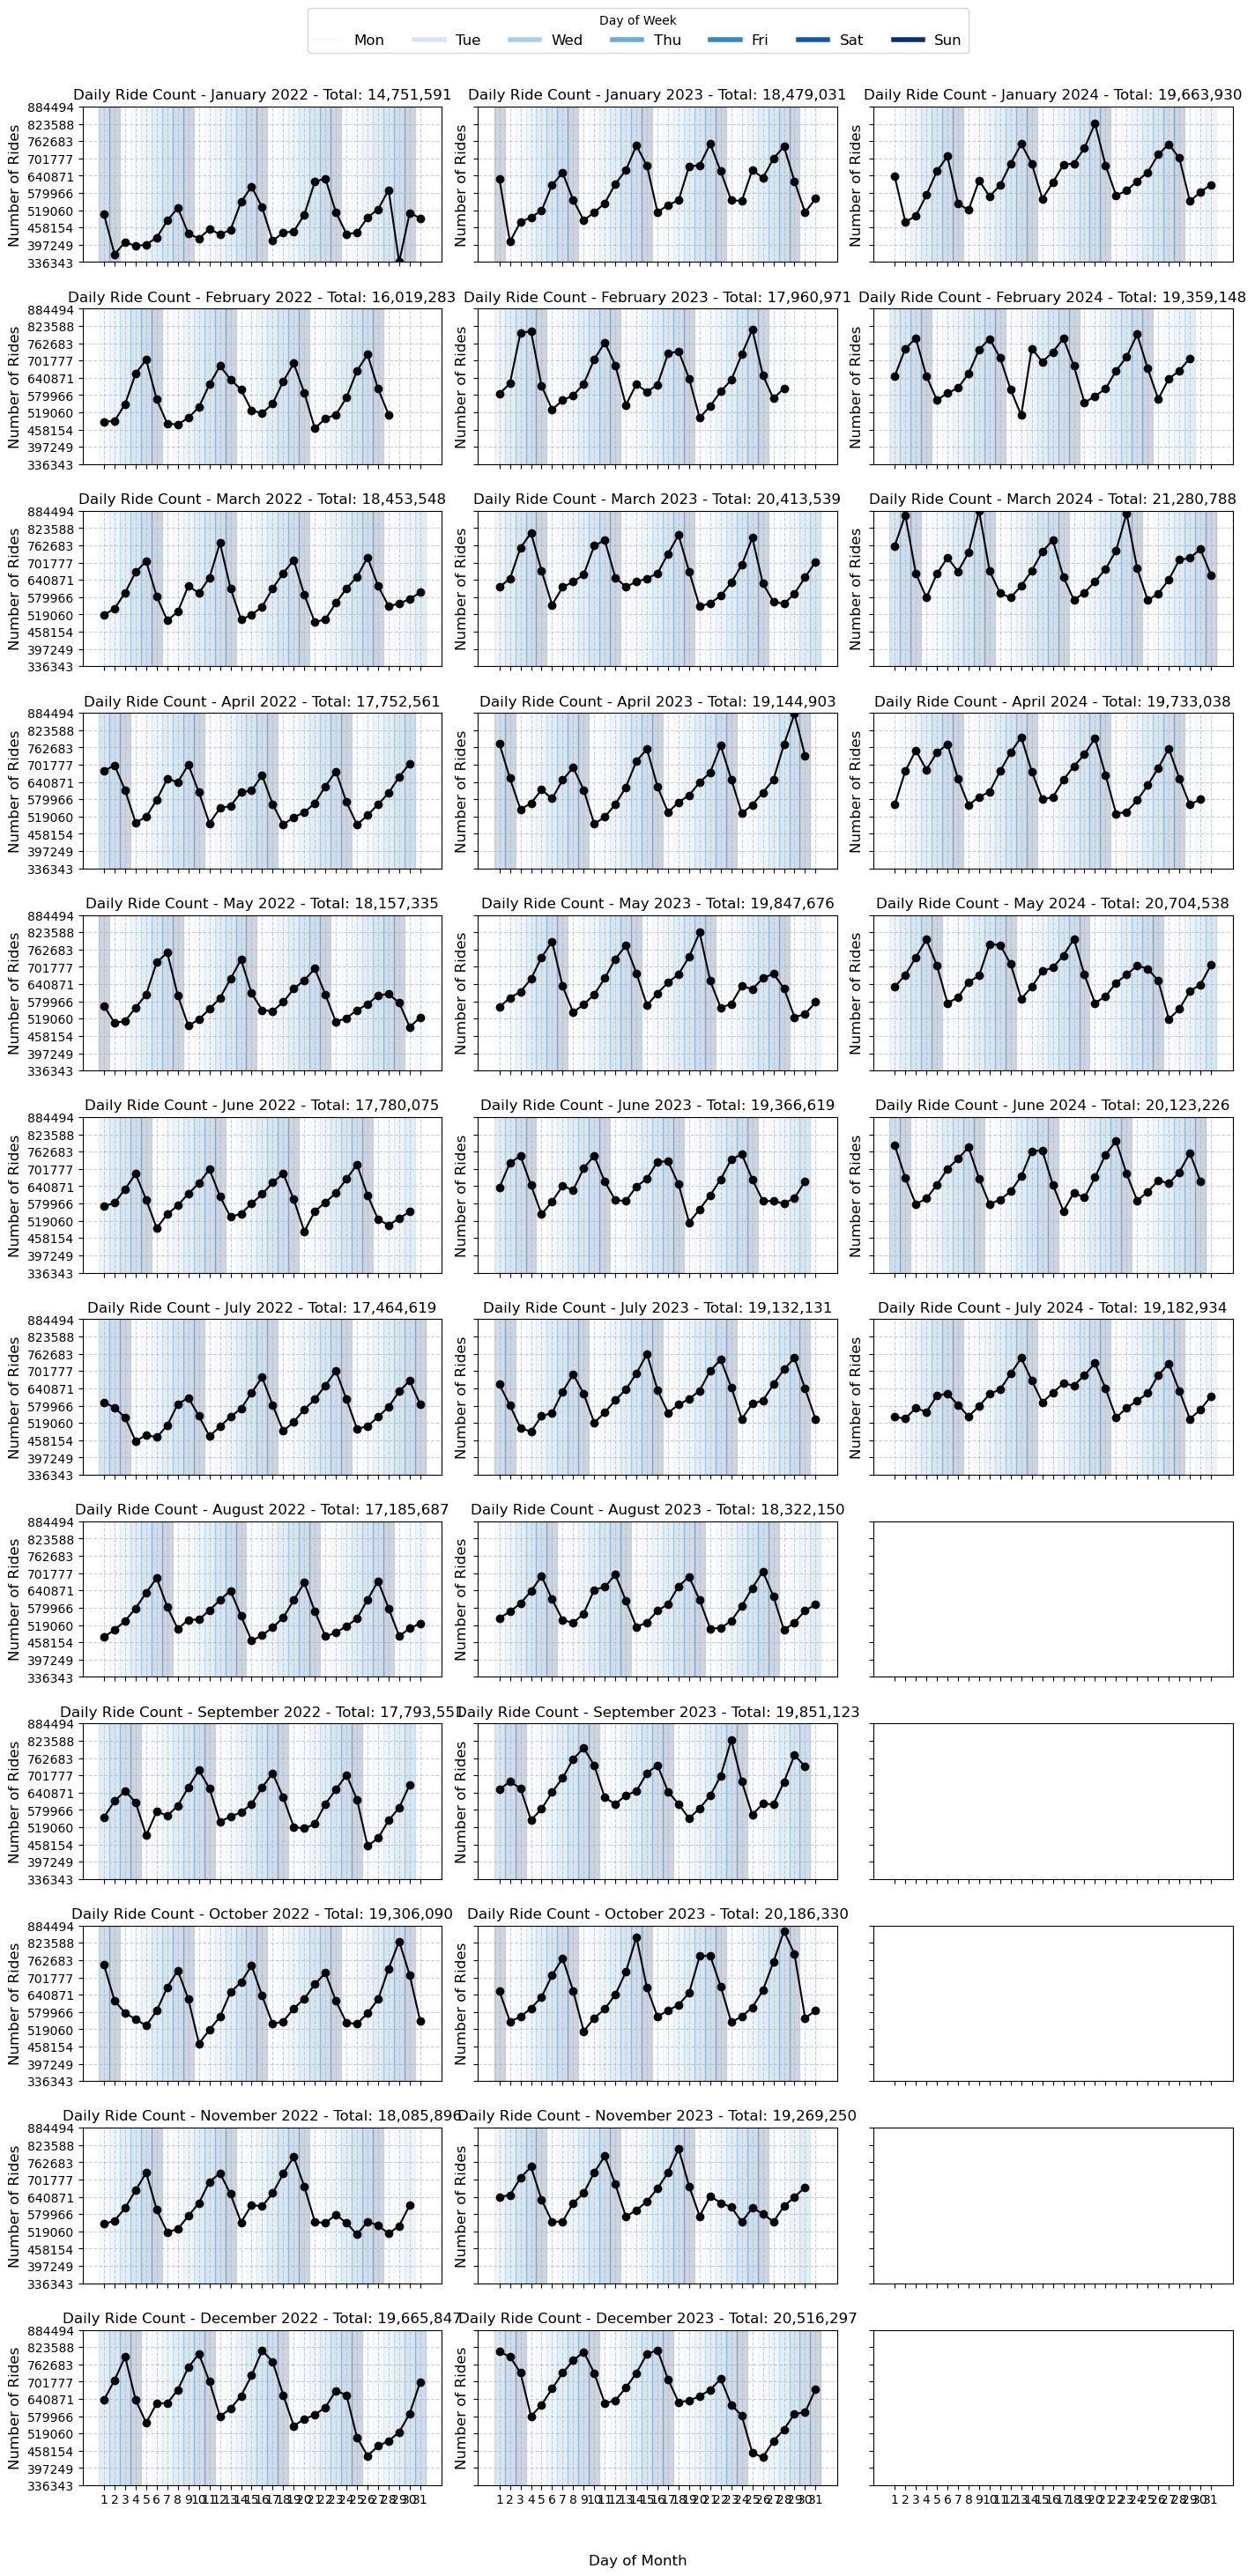

In [5]:
fig, axes = plt.subplots(
    12, 3, figsize=(15, 30), sharex=True, sharey=True, 
    gridspec_kw={'hspace': 0.3, 'wspace': 0.1}
)

# Plot each month without individual legends or x-labels
for i, (rides_per_day, month_name, year, num_rides) in enumerate(all_months):
    col = i // 12  # Determine the column
    row = i % 12   # Determine the row

    # Plot the data without individual x-labels
    ds.plot_rides_per_day(
        rides_per_day, month_name, year, num_rides,
        ax=axes[row, col], ylim=ylim, yticks=y_ticks, legend=False, show_xlabel=False
    )

# Create a global legend outside the plot grid
handles = [
    plt.Line2D([0], [0], color=plt.colormaps['Blues'](i / 6), lw=4,
               label=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'][i])
    for i in range(7)
]
fig.legend(handles=handles, title='Day of Week', fontsize=12, loc='upper center',
           bbox_to_anchor=(0.5, 0.99), ncol=7)

# Add only the shared x-label at the bottom
fig.text(0.5, 0.02, 'Day of Month', ha='center', fontsize=12)

# Adjust layout to avoid overlap
plt.subplots_adjust(left=0.08, right=0.95, top=0.95, bottom=0.05)
plt.savefig('myfig.png')

plt.show()